<a href="https://colab.research.google.com/github/mmppppss/IA_algorithms/blob/main/reconocimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import os
import requests

# URL de la imagen que quieres descargar
img_url = 'https://www.purina.com.bo/sites/default/files/2022-11/purina-brand-cuanto-vive-un-gato-nota_03.jpg'

# Crear el directorio para guardar la imagen
output_dir = '/content/images/gatos'
os.makedirs(output_dir, exist_ok=True)

# Nombre del archivo para guardar la imagen
img_name = os.path.join(output_dir, 'gato_prueba.jpg')

# Descargar la imagen
response = requests.get(img_url)

# Guardar la imagen en el directorio
with open(img_name, 'wb') as f:
    f.write(response.content)

print(f'Imagen descargada: {img_name}')


Imagen descargada: /content/images/gatos/gato_prueba.jpg


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [10]:
train_dir = 'images'
test_dir = 'test'

# Preprocesamiento y aumento de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 8 images belonging to 3 classes.
Found 2 images belonging to 3 classes.


In [12]:
modelo = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [13]:
# Compilar el modelo
modelo.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
historia = modelo.fit(train_generator, epochs=50, validation_data=test_generator)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3750 - loss: 0.6412 - val_accuracy: 0.5000 - val_loss: -1.4727
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: -1.4880 - val_accuracy: 0.5000 - val_loss: -5.9728
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step - accuracy: 0.5000 - loss: -5.7470 - val_accuracy: 0.5000 - val_loss: -16.5513
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step - accuracy: 0.5000 - loss: -15.8765 - val_accuracy: 0.5000 - val_loss: -38.4555
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step - accuracy: 0.5000 - loss: -37.6462 - val_accuracy: 0.5000 - val_loss: -79.9746
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step - accuracy: 0.5000 - loss: -74.8729 - val_accuracy: 0.5000 - val_loss: -154.5690
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step - accuracy: 0.5000 - loss: -144.9794 - val_accuracy: 0.5000 - val_loss: -280.8998
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step - accuracy: 0.5000 - loss: -274.5579 - val_accura

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.5000 - loss: -31849972.0000
Precisión en datos de prueba: 0.5


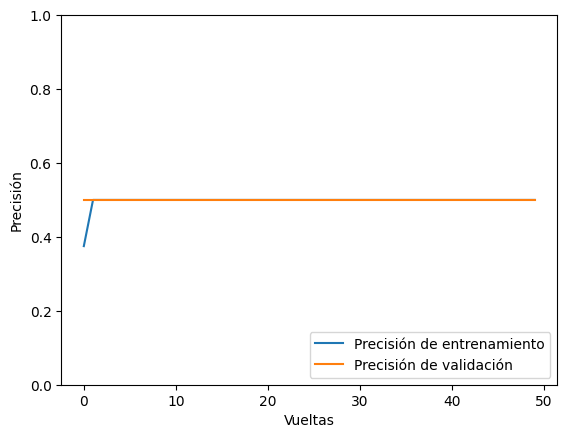

In [14]:
# Evaluar el modelo
test_loss, test_acc = modelo.evaluate(test_generator)
print('Precisión en datos de prueba:', test_acc)

# Graficar la precisión de entrenamiento y validación a lo largo del tiempo
plt.plot(historia.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(historia.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Vueltas')
plt.ylabel('Precisión')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [17]:
from ipywidgets import FileUpload
from IPython.display import display
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import io # Import the io module

# Crear un selector de archivos interactivo
uploader = FileUpload()
display(uploader)

# Esperar a que el usuario cargue la imagen
def on_upload_change(change):
    for filename, file in uploader.value.items():
        # Wrap file content in BytesIO to handle potential binary data
        # and ensure it's treated as an in-memory file-like object
        img = image.load_img(io.BytesIO(file['content']), target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0

        # Realizar la predicción
        prediccion = modelo.predict(img_array)

        # Interpretar la salida
        if prediccion[0][0] > 0.5:
            print("Predicción: GATO")
        else:
            print("Predicción: Clase PERRO")

# Asociar la función de cambio
uploader.observe(on_upload_change, names='value')

FileUpload(value={}, description='Upload')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicción: GATO
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicción: GATO
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicción: GATO
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicción: GATO
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicción: GATO
